# We'll manually implement the following steps:

- Convolution Operation
- ReLU Activation
- Pooling
- Flattening
- Fully Connected Layer
- Softmax Output

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Convolution

In [20]:
def convolve2d(image, kernel, stride=1, padding=0):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    output_h = int((image_h - kernel_h + 2 * padding) / stride) + 1
    output_w = int((image_w - kernel_w + 2 * padding) / stride) + 1
    output = np.zeros((output_h, output_w))
    
    # Apply padding if necessary
    if padding > 0:
        image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant')
    
    for y in range(0, output_h):
        for x in range(0, output_w):
            region = image[y*stride:y*stride+kernel_h, x*stride:x*stride+kernel_w]
            output[y, x] = np.sum(region * kernel)
    
    return output


# ReLu

In [5]:
def relu(feature_map):
    return np.maximum(0, feature_map)


In [6]:
def max_pooling(feature_map, size=2, stride=2):
    output_h = int((feature_map.shape[0] - size) / stride) + 1
    output_w = int((feature_map.shape[1] - size) / stride) + 1
    output = np.zeros((output_h, output_w))
    
    for y in range(0, output_h):
        for x in range(0, output_w):
            region = feature_map[y*stride:y*stride+size, x*stride:x*stride+size]
            output[y, x] = np.max(region)
    
    return output


In [7]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def fully_connected(flattened_input, weights, bias):
    return np.dot(flattened_input, weights) + bias


In [8]:
# Input Image (7x7) and Kernel (3x3)
image = np.random.rand(7, 7)
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Forward Pass
conv_output = convolve2d(image, kernel)
relu_output = relu(conv_output)
pooled_output = max_pooling(relu_output)

# Flattening
flattened = pooled_output.flatten()

# Fully Connected Layer
weights = np.random.rand(flattened.shape[0], 3)  # For 3 classes
bias = np.random.rand(3)
fc_output = fully_connected(flattened, weights, bias)

# Softmax for Output
output = softmax(fc_output)
print("Output Probabilities:", output)


Output Probabilities: [0.45696457 0.1817933  0.36124213]


# Using Tensorflow

In [21]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define CNN Architecture
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(3, activation='softmax')  # For 3 classes
# ])

# # Compile the Model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Print Model Summary
# model.summary()

# # Example Training (Assuming X_train and y_train are prepared)
# # model.fit(X_train, y_train, epochs=10, batch_size=32)


[[[252 245 235 ... 251 243 239]
  [255 245 238 ... 255 243 234]
  [235 245 252 ... 232 246 253]
  ...
  [253 244 242 ... 255 243 238]
  [252 245 235 ... 249 247 237]
  [247 242 251 ... 249 241 254]]]


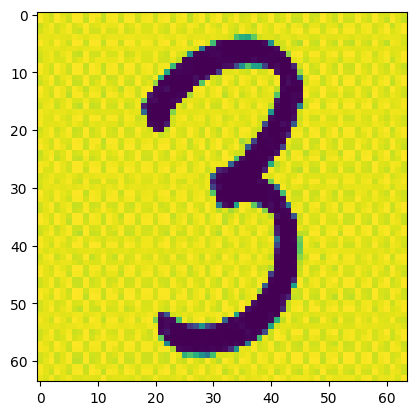

In [27]:
import cv2
image = cv2.imread('./images.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 64))  

input_image = np.expand_dims(image, axis=0)

print(input_image)
plt.imshow(image)
plt.show()